In [1]:
!pip install control

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 398 kB 3.9 MB/s 
  Created wheel for control: filename=control-0.9.2-py2.py3-none-any.whl size=403205 sha256=7d595166343edbf4d36e4eb90052818c8a0d6eb3457f2647f09c199d5186f49a
  Stored in directory: /root/.cache/pip/wheels/48/ef/c2/929bb5c59a1328df00a0561d0e68cd7c8537f33f5ce0ce741b
Successfully built control


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import lsim
from scipy.signal import lti
from scipy.signal import bode
import control as ctl

m = 10
b = 0.9
k = 100

A = np.array([[0.0, 1.0], [-k/m, -b/m]])

B = np.array([[0.0], [1/m]])

C = np.array([[1.0, 0.0],[0.0, 1.0]])

D = np.array([[0.0],[0.0]])

A


array([[  0.  ,   1.  ],
       [-10.  ,  -0.09]])

In [2]:
plant_ss = lti(A,B,C,D);
plant_ss


NameError: ignored

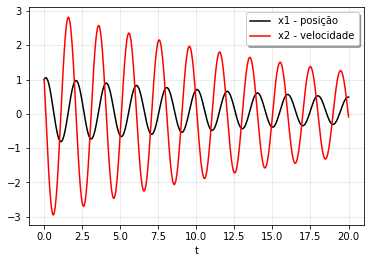

In [ ]:
y0 = [1.0, 0.0]
t = np.linspace(0, 20, 1001)
u = np.linspace(10, 10, 1001)

y0 = [1.0, 1.0]

tout, yout, xout = lsim(plant_ss, U=u, T=t, X0=y0)

#plt.plot(t, u, 'r', alpha=0.5, linewidth=1, label='input')
plt.plot(tout, yout[:,0], 'k', linewidth=1.5, label='x1 - posição')
plt.plot(tout, yout[:,1], 'r', linewidth=1.5, label='x2 - velocidade')
plt.legend(loc='best', shadow=True, framealpha=1)
plt.grid(alpha=0.3)
plt.xlabel('t')
plt.show()

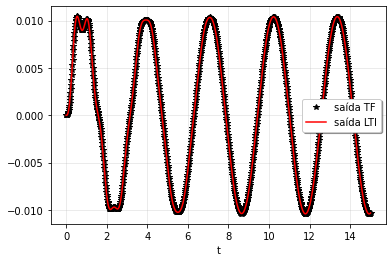

In [ ]:
y0 = [0.0, 0.0]
t = np.linspace(0, 15, 1001)
u = np.sin(2*t)

plant = ctl.TransferFunction(1,[1,0.9,100])
plantLTI = lti(1,[1,0.9,100])

to, yo = ctl.forced_response(plant, U=u, T=t)
tout, yout, xout = lsim(plantLTI, U=u, T=t, X0=y0)
#plt.plot(tout,u, 'k', linewidth=1.5, label='entrada')
plt.plot(tout, yo, 'k*', linewidth=1.5, label='saída TF')
plt.plot(tout, yout, 'r', linewidth=1.5, label='saída LTI')

plt.legend(loc='best', shadow=True, framealpha=1)
plt.grid(alpha=0.3)
plt.xlabel('t')
plt.show()